EXPERIMENT NO-07

**Aim**: Train a Deep Learning model to classify a given image using pretrained model of AlexNet,ZF-Net,VGGnet,GoogleNet,ResNet.

**Description:**
VGG introduced the concept of increasing the number of layers to improve accuracy. However,increasing the number of layers above 20 could prevent the model from converging.

The main reason is the vanishing gradient problem—after too many folds, the learning rate is so low that the model’s weights cannot change.
Another issue is gradient explosion. A solution is gradient clipping, which involves “clipping” the error derivative to a certain threshold during backward propagation and using these clipped gradients to update the weights. When the error derivative is rescaled, weights are also rescaled, and this reduces the chance of an overflow or underflow that can lead to gradient explosion.

The Residual Network (ResNet) architecture uses the concept of skip connections, allowing inputs to “skip” some convolutional layers. The result is a significant reduction in training time and improved accuracy. After the model learns a given feature, it won’t attempt to learn it
again—instead, it will focus on learning the new features. It’s a clever approach that can significantly improve model training.

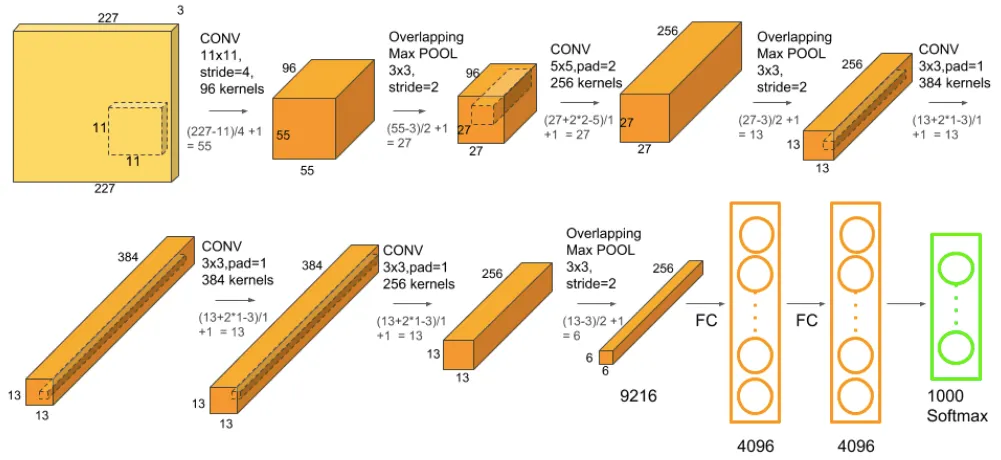

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-11-04 14:37:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  19.3MB/s    in 4.4s    

2024-11-04 14:37:22 (14.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

prepare the dataset and separate out the images for pre-trained models for image classification model:

first divide the folder contents into the train and validation directories.
Then, in each directory, create a separate directory for cats containing only cat images and a separate directory for dogs containing only dog images.

### Preparing the Dataset

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

check if the images have been loaded correctly:

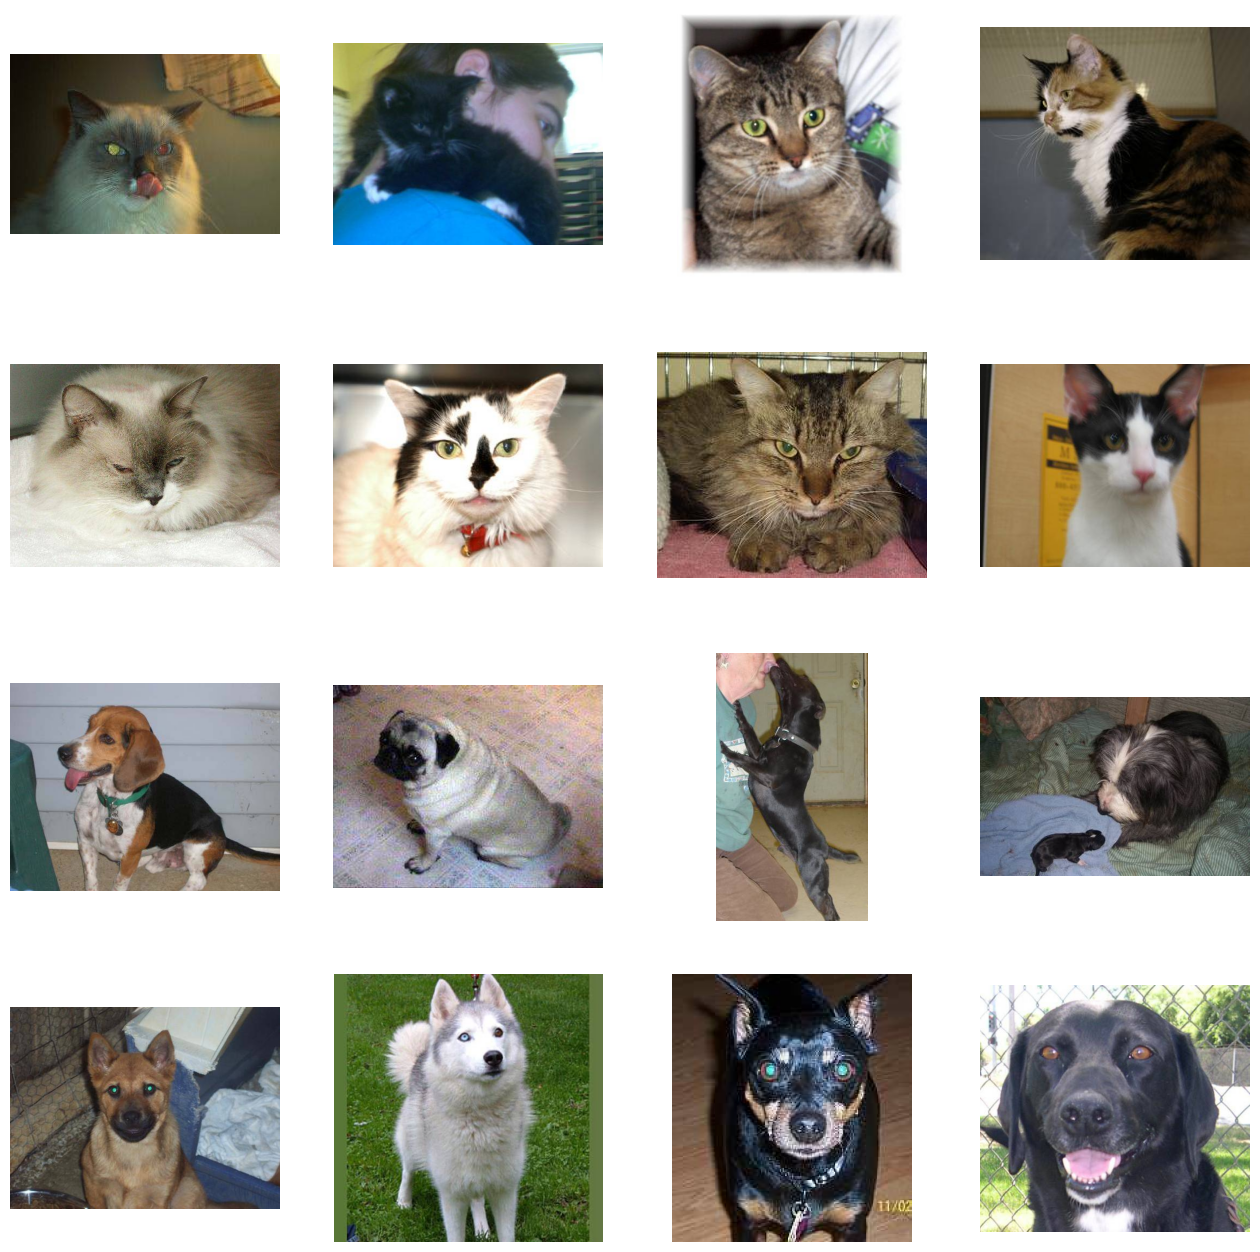

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)**

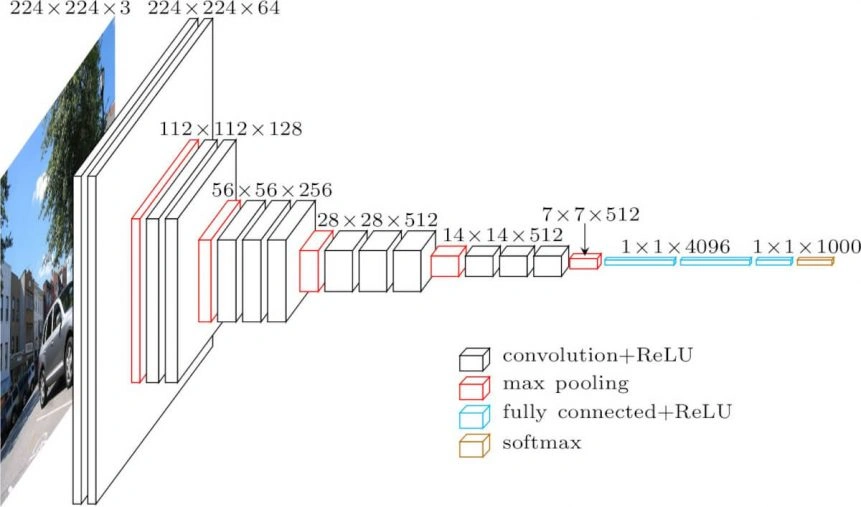

The following are the layers of the model:

Convolutional Layers = 13

Pooling Layers = 5

Dense Layers = 3

Let us explore the layers in detail:

**Input**: Image of dimensions (224, 224, 3).

**Convolution Layer Conv1**:

Conv1-1: 64 filters

Conv1-2: 64 filters and Max Pooling

Image dimensions: (224, 224)

**Convolution layer Conv2**: Now, we increase the filters to 128

Input Image dimensions: (112,112)

Conv2-1: 128 filters

Conv2-2: 128 filters and Max Pooling

**Convolution Layer Conv3**: Again, double the filters to 256, and now add another convolution layer

Input Image dimensions: (56,56)

Conv3-1: 256 filters

Conv3-2: 256 filters

Conv3-3: 256 filters and Max Pooling

**Convolution Layer Conv4**: Similar to Conv3, but now with 512 filters

Input Image dimensions: (28, 28)

Conv4-1: 512 filters

Conv4-2: 512 filters

Conv4-3: 512 filters and Max Pooling

**Convolution Layer Conv5**: Same as Conv4

Input Image dimensions: (14, 14)

Conv5-1: 512 filters

Conv5-2: 512 filters

Conv5-3: 512 filters and Max Pooling

The output dimensions here are (7, 7).

At this point, we flatten the output of this layer to generate a feature vector

Fully Connected/Dense FC1: 4096 nodes, generating a feature vector of size(1, 4096)

Fully ConnectedDense FC2: 4096 nodes generating a feature vector of size(1, 4096)
Fully Connected /Dense FC3: 4096 nodes, generating 1000 channels for 1000 classes. This is then passed on to a Softmax activation function

**Output layer**

As you can see, the model is sequential in nature and uses many filters. At each stage, small 3 * 3 filters are used to reduce the number of parameters.
All the hidden layers use the ReLU activation function. Even then, the number of parameters is 138 Billion, which makes it a slower and much larger model to train than others.

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255.)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

print(f'Train samples: {train_generator.samples}, Validation samples: {validation_generator.samples}')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train samples: 2000, Validation samples: 1000


## VGG16

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False

Step 4: Compile and Fit the models

In [9]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

use the original directories instead of the augmented datasets  that are used here. model is executed with just 10 epochs, but you can also increase them to get better results

NOTE: record the accuracy for different epoch values and compare


In [10]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 314ms/step - acc: 0.6146 - loss: 0.8931 - val_acc: 0.8120 - val_loss: 0.3892
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 313ms/step - acc: 0.7618 - loss: 0.4766 - val_acc: 0.8380 - val_loss: 0.3593
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - acc: 0.8012 - loss: 0.4379 - val_acc: 0.8840 - val_loss: 0.2750
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 310ms/step - acc: 0.8108 - loss: 0.3965 - val_acc: 0.8800 - val_loss: 0.2659
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - acc: 0.8140 - loss: 0.3999 - val_acc: 0.8920 - val_loss: 0.2452


In [11]:
# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - acc: 0.8958 - loss: 0.2295
Validation Loss: 0.24519167840480804
Validation Accuracy: 0.8920000195503235


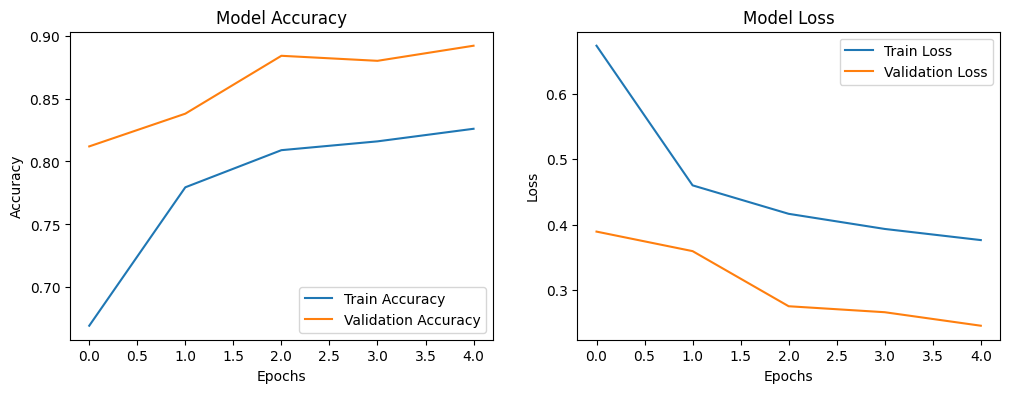

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import pandas as pd

# List of epoch values to test
epoch_values = [2,4,6]
results = []

for epochs in epoch_values:
    print(f"\nTraining for {epochs} epochs...")


    model = tf.keras.models.Model(base_model.input, x)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    # Fit the model
    history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose=1
)

    results.append({
        'epochs': epochs,
        'train_accuracy': history.history['acc'][-1],
        'val_accuracy': history.history['val_acc'][-1],
        'train_loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    })

results_df = pd.DataFrame(results)
print(results_df)



Training for 2 epochs...
Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - acc: 0.7663 - loss: 0.4800 - val_acc: 0.9080 - val_loss: 0.2339
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 336ms/step - acc: 0.8231 - loss: 0.3758 - val_acc: 0.9190 - val_loss: 0.2176

Training for 4 epochs...
Epoch 1/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 332ms/step - acc: 0.8118 - loss: 0.4312 - val_acc: 0.9210 - val_loss: 0.2075
Epoch 2/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - acc: 0.8103 - loss: 0.3796 - val_acc: 0.8910 - val_loss: 0.2444
Epoch 3/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - acc: 0.8444 - loss: 0.3484 - val_acc: 0.9080 - val_loss: 0.2197
Epoch 4/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - acc: 0.8602 - loss: 0.3298 - val_acc: 0.9050 - val_loss: 0.2272

Training for 6 epochs...
Epoch 1/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 336ms/step - acc: 0.8430 - loss: 0.3729 - val_acc: 0.9220 - val_loss: 0.2003
Epoch 2/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - acc: 0.8723 - loss: 0.3113

## ResNet50

In [15]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [16]:
# Add custom layers on top of ResNet50
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)


In [18]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])


In [22]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 299ms/step - acc: 0.5478 - loss: 0.6794 - val_acc: 0.5690 - val_loss: 0.6776
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - acc: 0.5540 - loss: 0.6827 - val_acc: 0.5830 - val_loss: 0.6701
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 304ms/step - acc: 0.5898 - loss: 0.6754 - val_acc: 0.6120 - val_loss: 0.6705
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 284ms/step - acc: 0.5875 - loss: 0.6776 - val_acc: 0.6300 - val_loss: 0.6538
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - acc: 0.5963 - loss: 0.6756 - val_acc: 0.5930 - val_loss: 0.6662
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 307ms/step - acc: 0.5896 - loss: 0.6668 - val_acc: 0.6190 - val_loss: 0.6625
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - acc: 0.5866 - loss: 0.6776 - val_acc: 0.6290 - val_loss: 0.6553
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - acc: 0.5554 - loss: 0.6807 - val_acc: 0.6150 - val_loss: 0.6568
Epoch 9/10
100/100 ━━━━━━━━━━━━━

In [23]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - acc: 0.5945 - loss: 0.6675
Validation Loss: 0.6646077036857605
Validation Accuracy: 0.6079999804496765


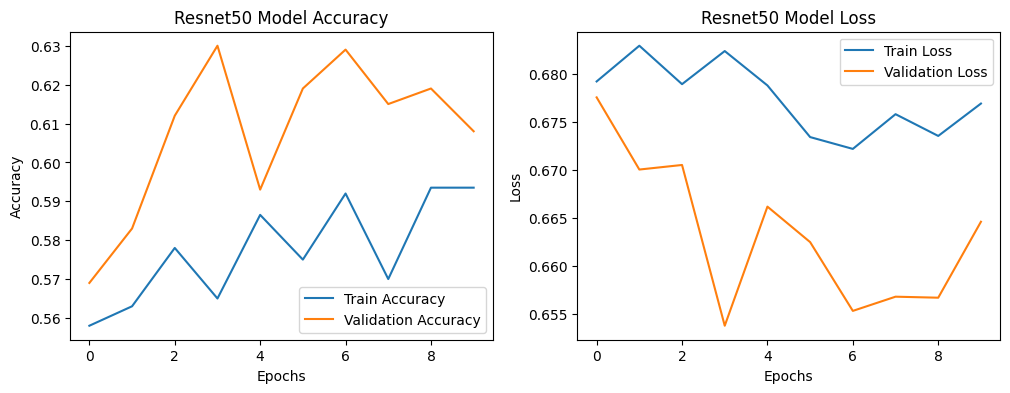

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Resnet50 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Resnet50 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Conclusion:** The given dataset is trained upon by VGG16 and ResNet50. VGG16 attained an accuracy of 80% within 5 epochs thus converging faster compared to ResNet50. We could see a clear increase in the training as well as validation accuracy as we go on increase the no.of epochs in VGG16. Whereas ResNet50 performed poor comparitively with an accuracy of just 60% after 5 epochs. And as we moved on increasing the no.of epochs, the validation accuracy started decreasing from 6 epochs and even the model couldn't learn further. Thus resnet50 attained best score after 6 epochs i.e 60%. From this we might conclude that ResNet50 might further need larger no.of epochs compared to VGG16.